In [32]:
import requests
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [33]:
tickers = {
    'Apple': 'AAPL',
    'HP': 'HPQ',
    'Dell': 'DELL',
    'Microsoft': 'MSFT',
    'Sony': 'SONY'
}

stock_data = {}

for name, symbol in tickers.items():
    ticker = yf.Ticker(symbol)
    try:
        df = ticker.history(period='5y')
        df['Company'] = name
        stock_data[name] = df
    except Exception as e:
        print(f"Error loading {name} ({symbol}):", e)

combine = pd.concat(stock_data.values(), keys=stock_data.keys())

combine.tail()

Open       High        Low      Close  \
     Date                                                                    
Sony 2025-07-22 00:00:00-04:00  24.110001  24.160000  24.040001  24.090000   
     2025-07-23 00:00:00-04:00  25.150000  25.600000  25.139999  25.260000   
     2025-07-24 00:00:00-04:00  25.690001  25.690001  25.350000  25.379999   
     2025-07-25 00:00:00-04:00  25.010000  25.040001  24.790001  24.879999   
     2025-07-28 00:00:00-04:00  24.424999  24.490000  24.290001  24.360001   

                                 Volume  Dividends  Stock Splits Company  
     Date                                                                 
Sony 2025-07-22 00:00:00-04:00  2899500        0.0           0.0    Sony  
     2025-07-23 00:00:00-04:00  5848200        0.0           0.0    Sony  
     2025-07-24 00:00:00-04:00  5830300        0.0           0.0    Sony  
     2025-07-25 00:00:00-04:00  3727000        0.0           0.0    Sony  
     2025-07-28 00:00:00-04:00  2243585        0.0           0.0    Sony

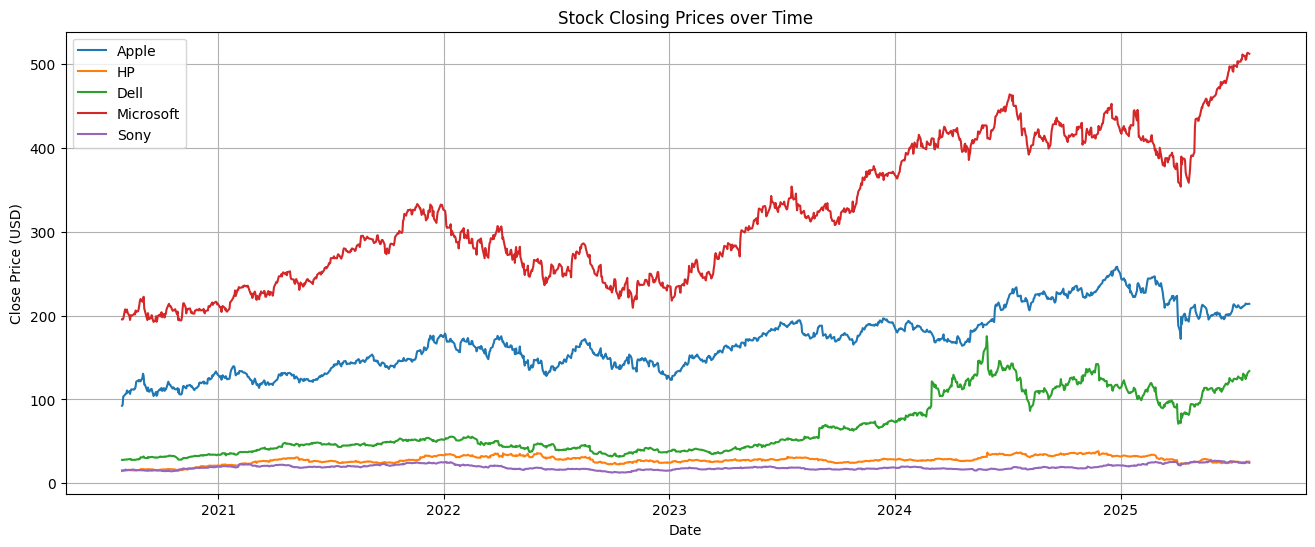

In [34]:
plt.figure(figsize=(16,6))

for name in tickers:
    plt.plot(stock_data[name]['Close'], label=name)
plt.title('Stock Closing Prices over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Stock Closing Prices Over Time
### The chart above visualizes the closing stock prices of selected tech companies from 2021 to 2025. Based on the trends observed:

1. Microsoft consistently maintained the highest closing prices throughout the period, with noticeable peaks in 2022, a moderate dip in 2023, and a strong upward trend from late 2024 into 2025.

2. Apple showed a steady and consistent increase over the five years, with no significant dips and its highest prices recorded in 2025.

3. Dell experienced a strong performance, with a clear upward trajectory from 2021, reaching its peak levels between 2024 and 2025.

4. HP and Sony exhibited relatively stable performance, with minor fluctuations and no major upward or downward trends during the period.

### Conclusion:
Among the group, Microsoft demonstrated the strongest overall stock performance in terms of sustained high closing prices and recovery after minor setbacks. Apple and Dell also showed positive growth trends, while HP and Sony remained largely stable.


In [35]:
returns = {}
for name, df in stock_data.items():
    start_price = df['Close'].iloc[0]
    end_price = df['Close'].iloc[-1]
    returns[name] = ((end_price - start_price) / start_price) * 100

returns

{'Apple': 131.69232578416347,
 'HP': 78.5968593976751,
 'Dell': 380.94394439291455,
 'Microsoft': 162.1390283095509,
 'Sony': 59.27399431576558}

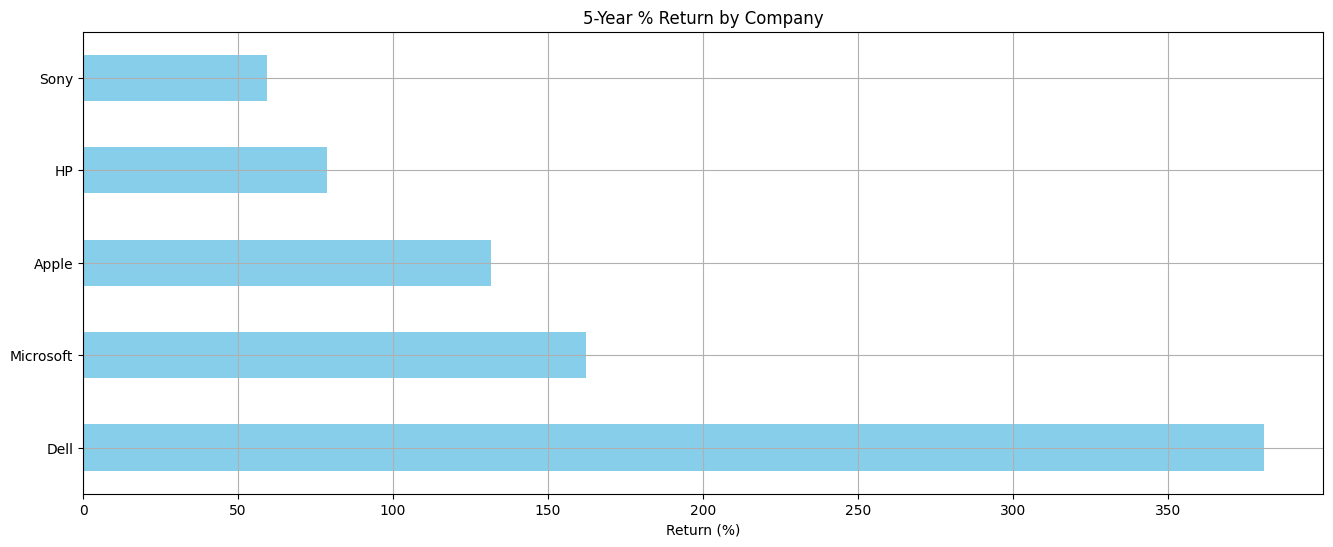

In [36]:
plt.figure(figsize=(16,6))
pd.Series(returns).sort_values(ascending=False).plot(kind='barh', title='5-Year % Return by Company', color='skyblue')
plt.xlabel('Return (%)')
plt.grid(True)
plt.show()

# 5-Year Percentage Return by Company

### The horizontal bar chart above illustrates the percentage return on investment for selected tech companies from 2021 to 2025. The following insights can be drawn:

1. Dell leads with the highest percentage return, exceeding 350%, indicating substantial value growth over the five-year period. Investors who held Dell stock during this timeframe would have seen significant gains.

2. Microsoft ranks second with returns over 150%, aligning with its reputation as a consistently strong performer in the tech sector.

3. Apple follows closely with returns around 140%, demonstrating stable and reliable growth.

4. HP and Sony show comparatively lower returns. While HP achieved a modest return of approximately 70%, Sony trails with returns estimated between 55% and 60%. These figures suggest modest performance relative to the top three companies.

### Conclusion:

Dell delivered the most impressive growth, making it the standout performer in terms of long-term percentage returns. Microsoft and Apple also showed strong and consistent price appreciation, affirming their reputations as reliable investments.

However, it's worth noting that higher average closing prices, such as those observed for Apple and Microsoft, do not necessarily translate into the highest returns. This is because percentage return is based on relative growth from the starting point, not just the absolute stock price. Dell’s sharp rise, particularly between 2024 and 2025, amplified its return despite having a lower closing price overall.

This suggests that returns may be influenced more by momentum and timing of growth rather than just stability or absolute price level. In contrast, HP and Sony provided more conservative returns, reflecting modest but steady growth.

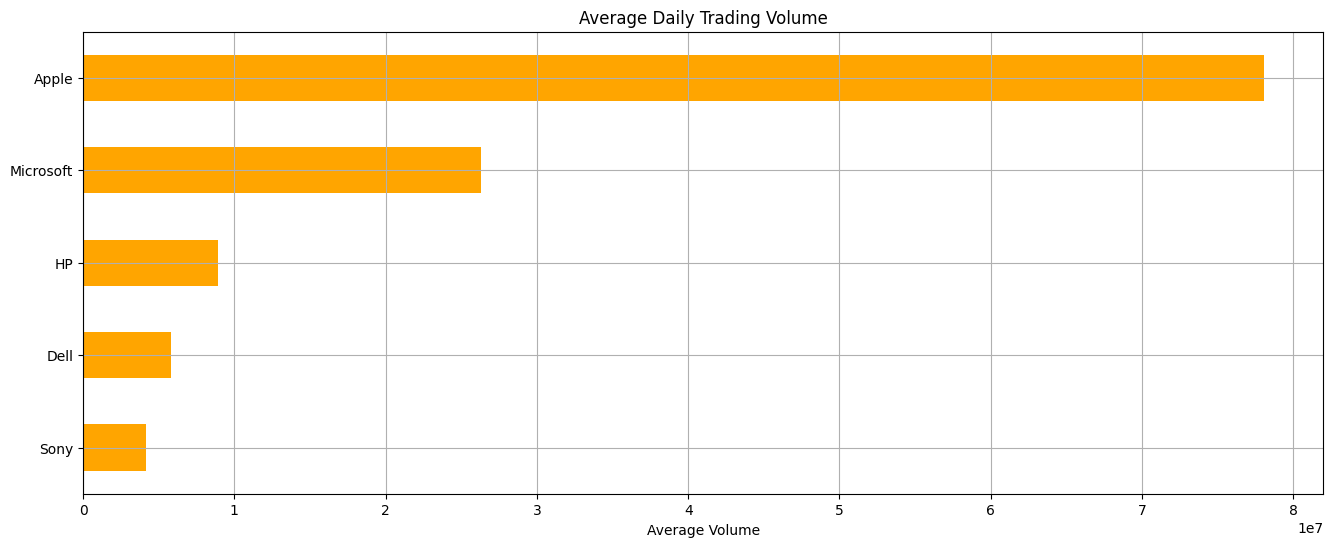

In [37]:
plt.figure(figsize=(16,6))

avg_volume = {name: df['Volume'].mean() for name, df in stock_data.items()}
pd.Series(avg_volume).sort_values().plot(kind='barh', title='Average Daily Trading Volume', color='orange')
plt.xlabel('Average Volume')
plt.grid(True)
plt.show()

# Average Daily Trading Volume

### Average Daily Trading Volume
The horizontal bar chart above displays the average daily trading volume for selected tech companies between 2021 and 2025. This metric reflects how frequently a stock is traded, which can be a proxy for investor interest and liquidity. Key insights include:

1. Apple leads by a wide margin, with average daily trading volume nearing 8 million shares (8 × 10⁷). Despite not having the highest returns, its brand dominance and investor trust likely contribute to sustained high trading activity.

2. Microsoft ranks second, with trading volumes just above 2 million shares per day. This aligns with its strong price performance and consistent investor interest.

3. HP follows with average daily volumes close to 1 million shares, showing moderate market activity despite its relatively lower returns.

4. Dell, despite delivering the highest percentage return, surprisingly comes in fourth with volumes around 0.5 million shares. This suggests its strong performance may not yet be widely reflected in investor behavior.

5. Sony has the lowest trading volume among the group, which corresponds with its more modest price appreciation and return performance.

### Conclusion:
There appears to be a disconnect between stock performance and trading volume. Companies like Apple and Microsoft enjoy high daily trading activity, possibly due to their market familiarity, perceived stability, and brand loyalty even if their returns aren't the highest. Conversely, Dell, while offering the best return over five years, sees comparatively lower trading volume. This may suggest that trading behavior is influenced more by brand recognition and perceived reliability than by actual performance metrics.

In [38]:
for name, df in stock_data.items():
    print(f"\n{name} - Dividends Summary:")
    print(df[df['Dividends'] > 0][['Dividends']])

    print(f"{name} - Stock Splits Summary")
    print(df[df['Stock Splits'] > 0][['Stock Splits']])


Apple - Dividends Summary:
                           Dividends
Date                                
2020-08-07 00:00:00-04:00      0.205
2020-11-06 00:00:00-05:00      0.205
2021-02-05 00:00:00-05:00      0.205
2021-05-07 00:00:00-04:00      0.220
2021-08-06 00:00:00-04:00      0.220
2021-11-05 00:00:00-04:00      0.220
2022-02-04 00:00:00-05:00      0.220
2022-05-06 00:00:00-04:00      0.230
2022-08-05 00:00:00-04:00      0.230
2022-11-04 00:00:00-04:00      0.230
2023-02-10 00:00:00-05:00      0.230
2023-05-12 00:00:00-04:00      0.240
2023-08-11 00:00:00-04:00      0.240
2023-11-10 00:00:00-05:00      0.240
2024-02-09 00:00:00-05:00      0.240
2024-05-10 00:00:00-04:00      0.250
2024-08-12 00:00:00-04:00      0.250
2024-11-08 00:00:00-05:00      0.250
2025-02-10 00:00:00-05:00      0.250
2025-05-12 00:00:00-04:00      0.260
Apple - Stock Splits Summary
                           Stock Splits
Date                                   
2020-08-31 00:00:00-04:00           4.0

HP - Div

In [39]:
for name, df in stock_data.items():
    df['SMA_30'] = df['Close'].rolling(window=30).mean()
    df['EMA_30'] = df['Close'].ewm(span=30, adjust=False).mean()

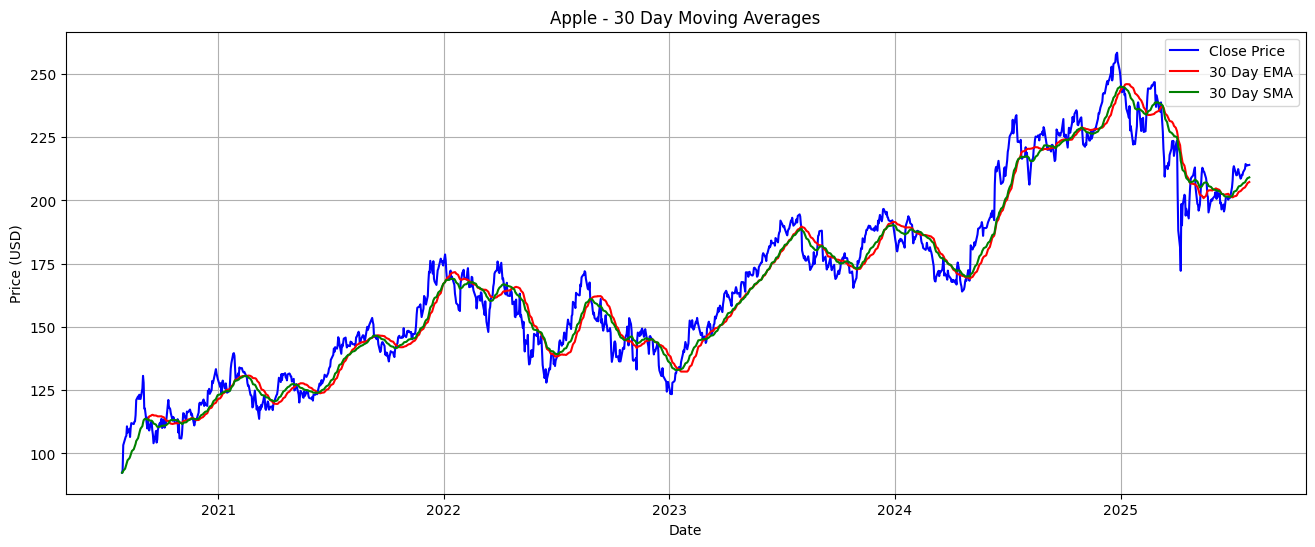

In [40]:
company = 'Apple'
df = stock_data[company]

plt.figure(figsize=(16,6))
plt.plot(df['Close'], label='Close Price', color='blue')
plt.plot(df['SMA_30'], label='30 Day EMA', color='red')
plt.plot(df['EMA_30'], label='30 Day SMA', color='green')
plt.title(f"{company} - 30 Day Moving Averages")
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

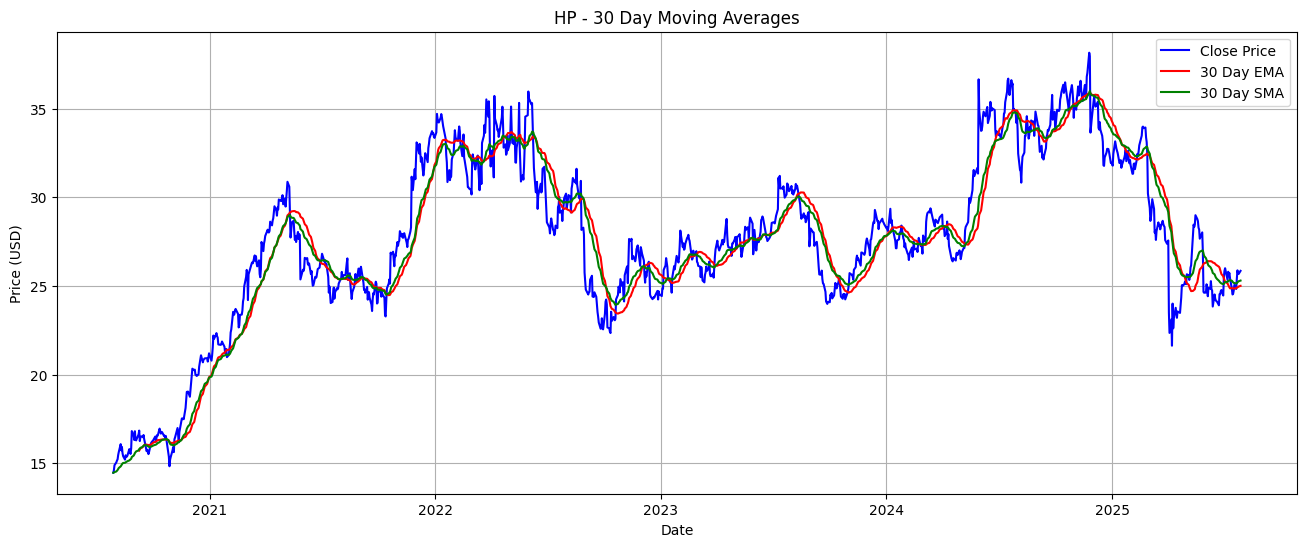

In [41]:
company = 'HP'
df = stock_data[company]

plt.figure(figsize=(16,6))
plt.plot(df['Close'], label='Close Price', color='blue')
plt.plot(df['SMA_30'], label='30 Day EMA', color='red')
plt.plot(df['EMA_30'], label='30 Day SMA', color='green')
plt.title(f"{company} - 30 Day Moving Averages")
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

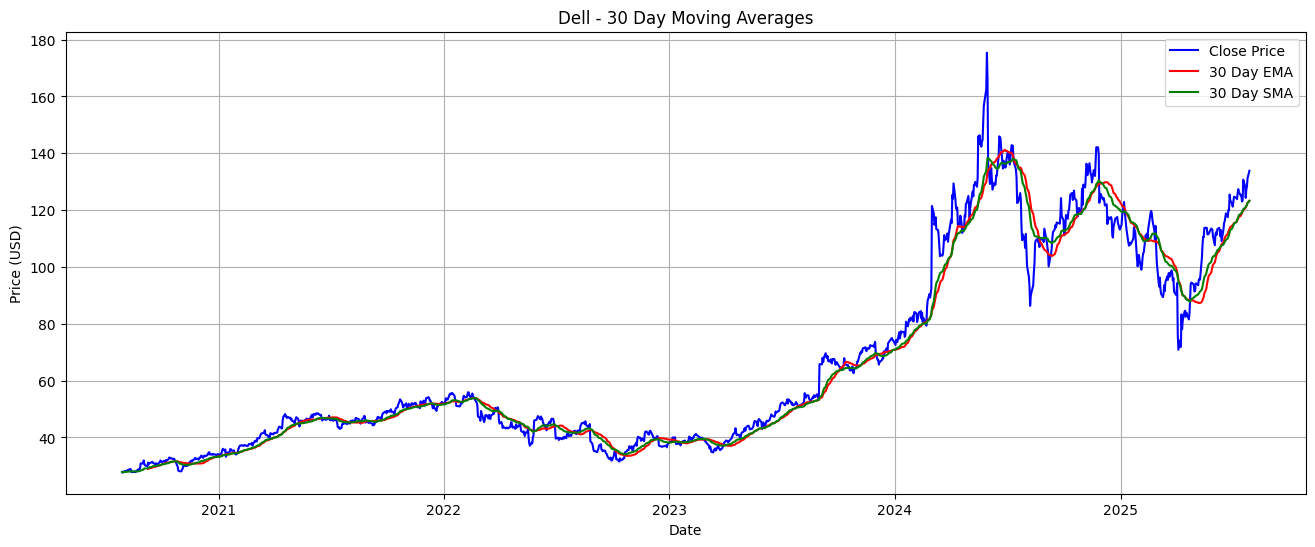

In [42]:
company = 'Dell'
df = stock_data[company]

plt.figure(figsize=(16,6))
plt.plot(df['Close'], label='Close Price', color='blue')
plt.plot(df['SMA_30'], label='30 Day EMA', color='red')
plt.plot(df['EMA_30'], label='30 Day SMA', color='green')
plt.title(f"{company} - 30 Day Moving Averages")
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

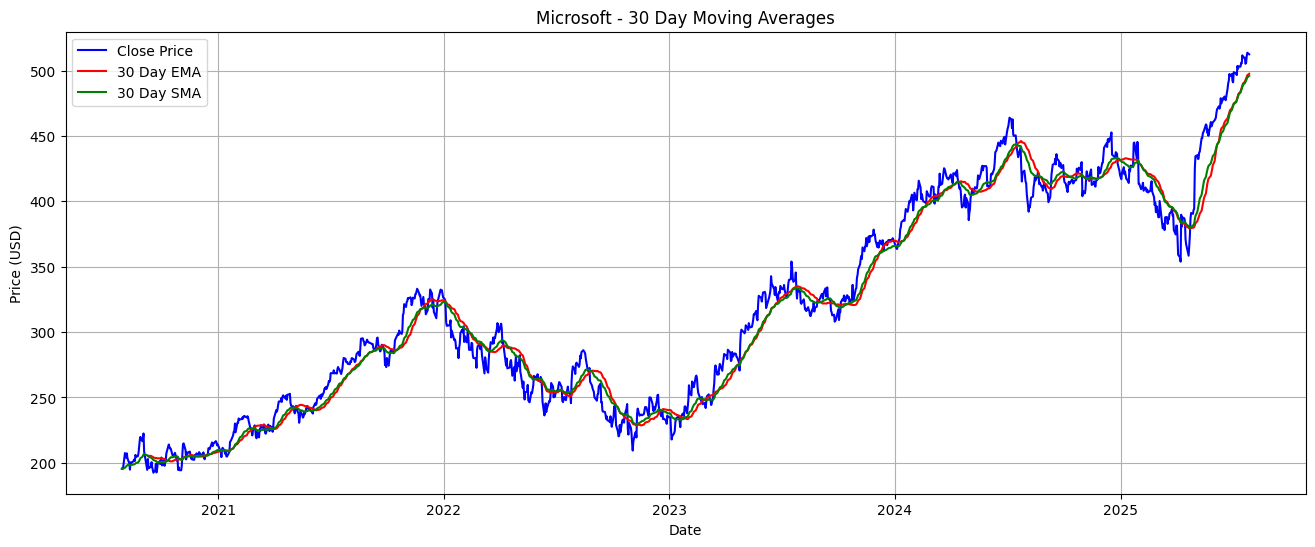

In [60]:
company = 'Microsoft'
df = stock_data[company]

plt.figure(figsize=(16,6))
plt.plot(df['Close'], label='Close Price', color='blue')
plt.plot(df['SMA_30'], label='30 Day EMA', color='red')
plt.plot(df['EMA_30'], label='30 Day SMA', color='green')
plt.title(f"{company} - 30 Day Moving Averages")
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

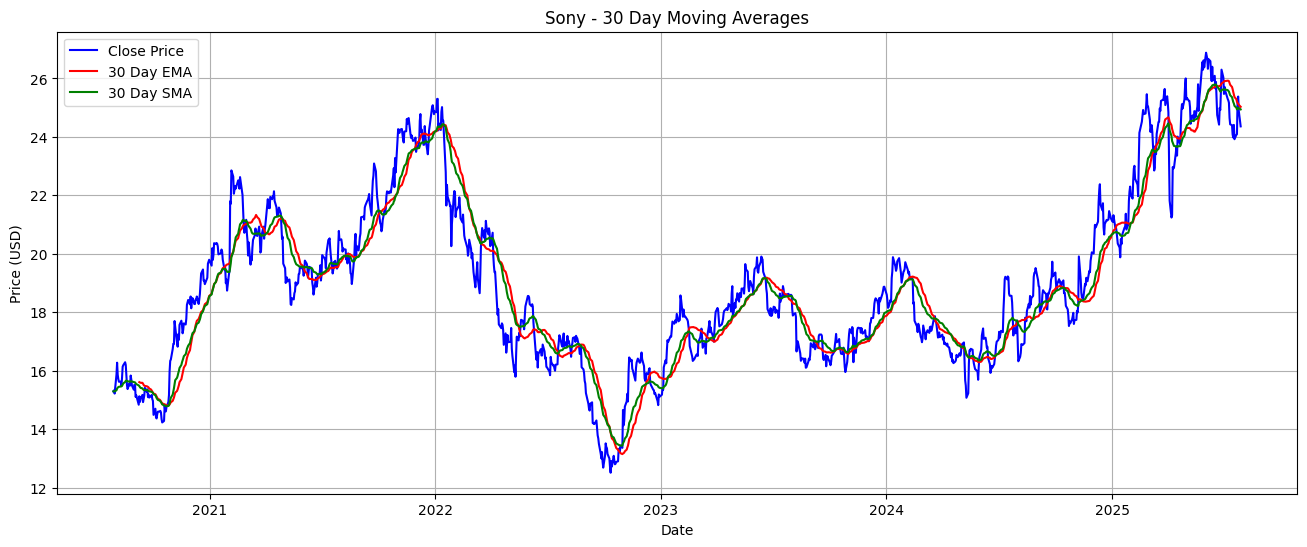

In [61]:
company = 'Sony'
df = stock_data[company]

plt.figure(figsize=(16,6))
plt.plot(df['Close'], label='Close Price', color='blue')
plt.plot(df['SMA_30'], label='30 Day EMA', color='red')
plt.plot(df['EMA_30'], label='30 Day SMA', color='green')
plt.title(f"{company} - 30 Day Moving Averages")
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

#30-Day Moving Averages

### The line charts above display the 30-day Simple Moving Average (SMA) and Exponential Moving Average (EMA) for selected tech companies between 2021 and 2025. These moving averages help smooth out daily price fluctuations and highlight longer-term trends in the closing prices.

* The SMA calculates the average closing price over a fixed window (30 days) with equal weight given to each day.

* The EMA gives more weight to recent prices, making it more responsive to recent market changes.

#### Observations by Company:

Apple
Apple's closing price remained consistently above both the EMA and SMA throughout the period. A noticeable surge in 2024 pushed the closing price significantly above both moving averages. By 2025, the closing price dipped slightly but remained relatively close to the moving averages. The EMA consistently stayed above the SMA, indicating steady upward momentum, with only a minor reversal observed in mid-2025.

HP
HP’s closing price also remained above both moving averages for most of the period. However, it exhibited a pattern of mid-period dips followed by recoveries—visible around 2022 and again in mid-2025. The EMA closely tracked the closing price, reflecting short-term volatility, while generally staying above the SMA, indicating ongoing upward pressure during recovery phases.

Dell
Dell’s closing price was relatively flat until 2024, after which it experienced sharp gains. However, mid-2024 and 2025 also brought brief but noticeable corrections. Interestingly, the SMA stayed above the EMA for most of the period, except during price drops, when the EMA rose above it — suggesting volatility and sudden downward movements temporarily skewing recent averages.

Microsoft
Microsoft's closing price remained steadily above both moving averages. A dip occurred between 2022 and 2023, but the price recovered strongly by 2024. By 2025, the closing price was significantly above both the EMA and SMA, showing strong bullish momentum. The SMA generally stayed above the EMA, with a brief reversal in mid-2024 during a short-term decline.

Sony
Sony showed less consistency in its price movements. There were strong gains in 2021 and sharp declines in 2023. From mid-2024 onward, the closing price trended consistently above both moving averages. Unlike the other companies, Sony’s EMA and SMA diverged more noticeably, with the EMA remaining above the SMA for most of the period. Between 2022 and 2023, the EMA even stayed above both the SMA and the closing price, possibly indicating prior upward momentum followed by delayed correction.

### Conclusion
The 30-day moving averages reveal important trends in how each company's stock price evolved over time. In general, when the closing price remains above both the EMA and SMA, it signals sustained positive momentum. Most of the companies—especially Apple, Microsoft, and HP—showed this pattern for extended periods, indicating strong investor confidence.

In cases where the EMA consistently stayed above the SMA (e.g., Apple and Sony), it suggested recent upward momentum, as the EMA responds more quickly to short-term price increases. On the other hand, when the SMA was above the EMA (as seen in Dell during certain periods), it reflected slower or more volatile recovery, often following short-term price dips.

While the technical details of moving averages may take time to fully master, these charts already demonstrate how they can be used to better understand a stock's performance beyond just the raw closing price. As observed, trends in moving averages often correlate with price stability, growth patterns, and investor sentiment over time.

In [45]:
for name, df in stock_data.items():
    df['volatility_30'] = df['Close'].rolling(window=30).std()

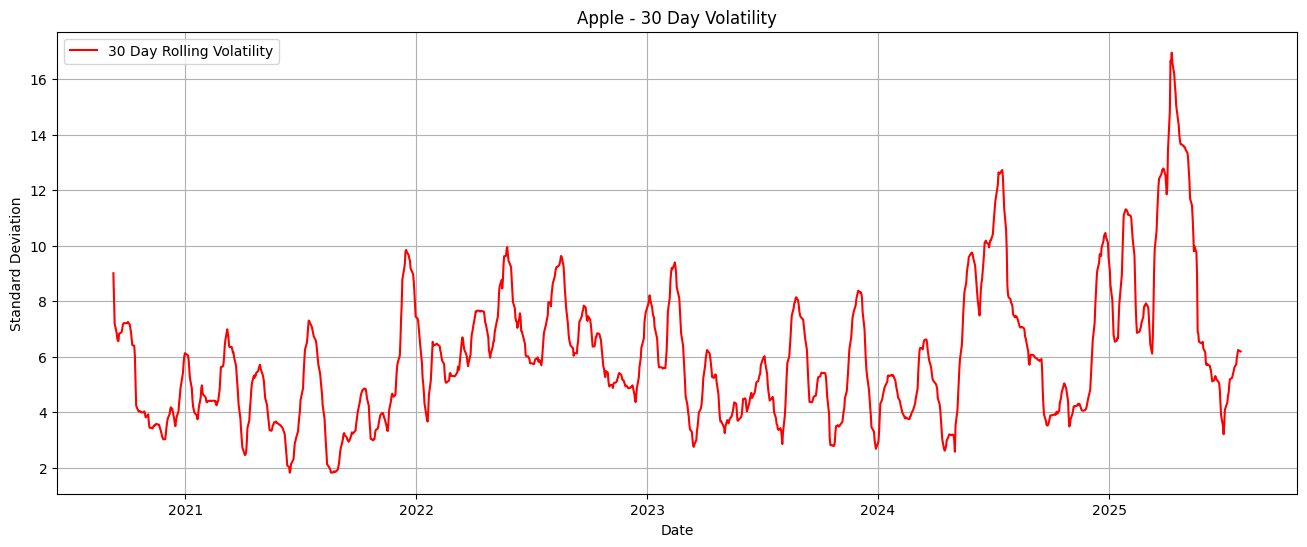

In [46]:
plt.figure(figsize=(16,6))

df = stock_data['Apple']

plt.Figure(figsize=(12,6))
plt.plot(df['volatility_30'], label='30 Day Rolling Volatility', color='red')
plt.title('Apple - 30 Day Volatility')
plt.xlabel('Date')
plt.ylabel('Standard Deviation')
plt.legend()
plt.grid(True)
plt.show()

<Figure size 1200x600 with 0 Axes>

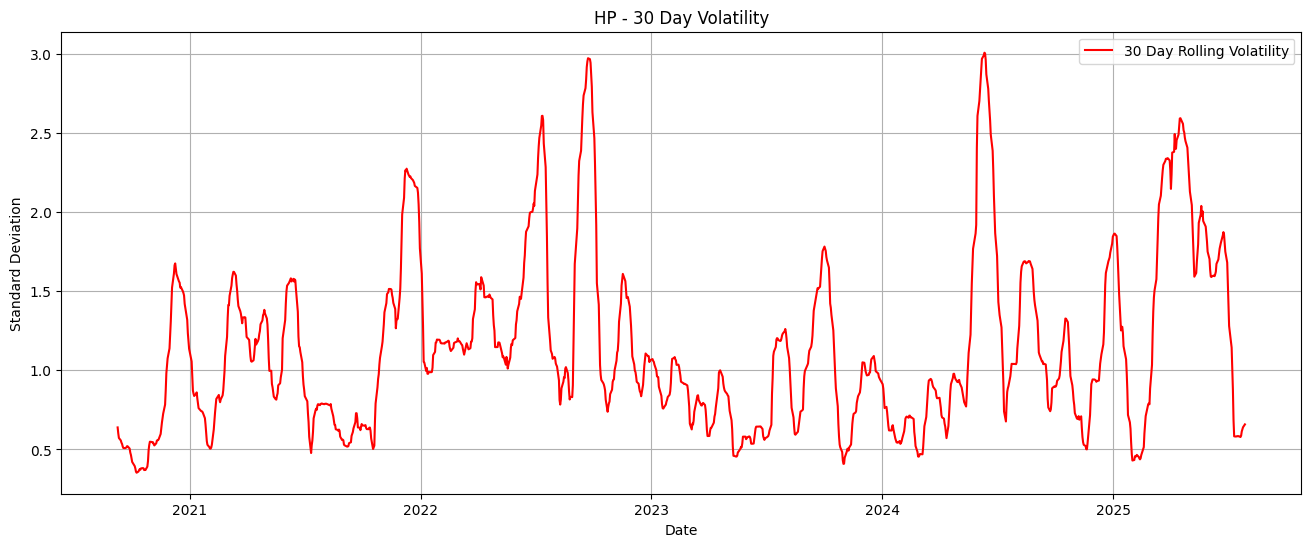

In [62]:
plt.figure(figsize=(12,6))

df = stock_data['HP']

plt.figure(figsize=(16,6))
plt.plot(df['volatility_30'], label='30 Day Rolling Volatility', color='red')
plt.title('HP - 30 Day Volatility')
plt.xlabel('Date')
plt.ylabel('Standard Deviation')
plt.legend()
plt.grid(True)
plt.show()

<Figure size 1200x600 with 0 Axes>

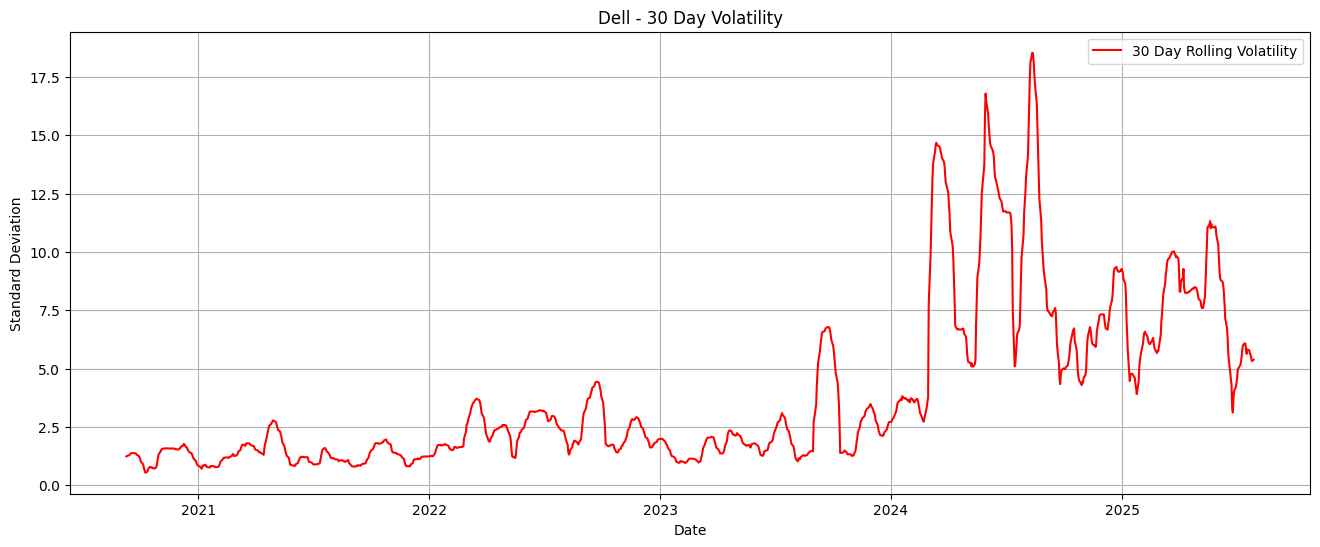

In [63]:
plt.figure(figsize=(12,6))

df = stock_data['Dell']

plt.figure(figsize=(16,6))
plt.plot(df['volatility_30'], label='30 Day Rolling Volatility', color='red')
plt.title('Dell - 30 Day Volatility')
plt.xlabel('Date')
plt.ylabel('Standard Deviation')
plt.legend()
plt.grid(True)
plt.show()

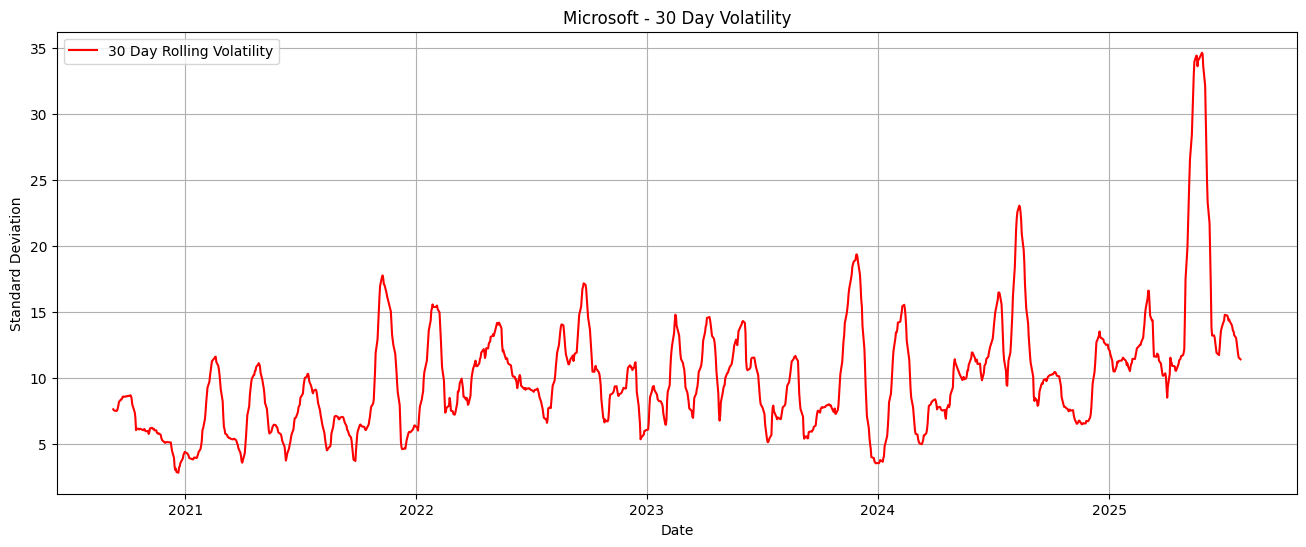

In [49]:
plt.figure(figsize=(16,6))

df = stock_data['Microsoft']

plt.Figure(figsize=(12,6))
plt.plot(df['volatility_30'], label='30 Day Rolling Volatility', color='red')
plt.title('Microsoft - 30 Day Volatility')
plt.xlabel('Date')
plt.ylabel('Standard Deviation')
plt.legend()
plt.grid(True)
plt.show()

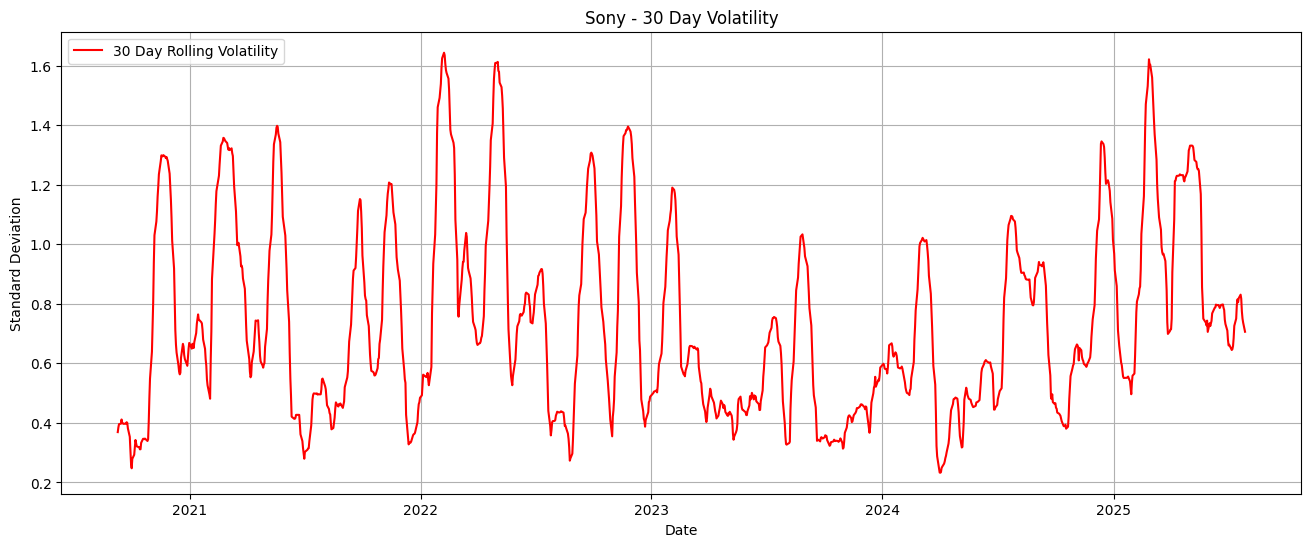

In [64]:
plt.figure(figsize=(16,6))

df = stock_data['Sony']

plt.plot(df['volatility_30'], label='30 Day Rolling Volatility', color='red')
plt.title('Sony - 30 Day Volatility')
plt.xlabel('Date')
plt.ylabel('Standard Deviation')
plt.legend()
plt.grid(True)
plt.show()

# 30-Day Rolling Volatility

The 30-day rolling volatility charts highlight significant differences in stock price stability across the selected tech companies over the five-year period.

1. Microsoft and Apple displayed the highest volatility overall. Microsoft, in particular, showed wide fluctuations with standard deviations ranging from 4 to over 35, especially in 2025, suggesting heightened investor uncertainty or market reactions to external events. Apple followed closely with steady volatility throughout the years but also experienced sharp spikes, particularly in mid-2025.

2. Dell showed relatively moderate volatility in earlier years but experienced a dramatic surge in 2024, reaching a peak of 17.5, likely reflecting major price swings during its rapid growth phase. It settled into a more moderate range in 2025, between 5 and 10.

3. HP exhibited lower overall volatility, mostly ranging between 0.5 and 3, with occasional spikes in mid-year quarters. Despite some fluctuation, it remained one of the more stable stocks throughout the five-year period.

4. Sony showed the lowest volatility, with standard deviations consistently between 0.2 and 1.6, indicating very stable price behavior and minimal deviation from its moving average. This suggests limited short-term risk but also potentially lower investor excitement or momentum.

### Conclusion
High volatility often signals increased trading activity, investor speculation, or external shocks, while low volatility can reflect either market stability or lack of interest. Microsoft, Apple, and Dell saw the most volatility, coinciding with their stronger price movements and returns. In contrast, Sony and HP were much more stable, possibly appealing to risk-averse investors but offering fewer aggressive growth opportunities.

In [51]:
for name, df in stock_data.items():
    df['Daily Return'] = df['Close'].pct_change()

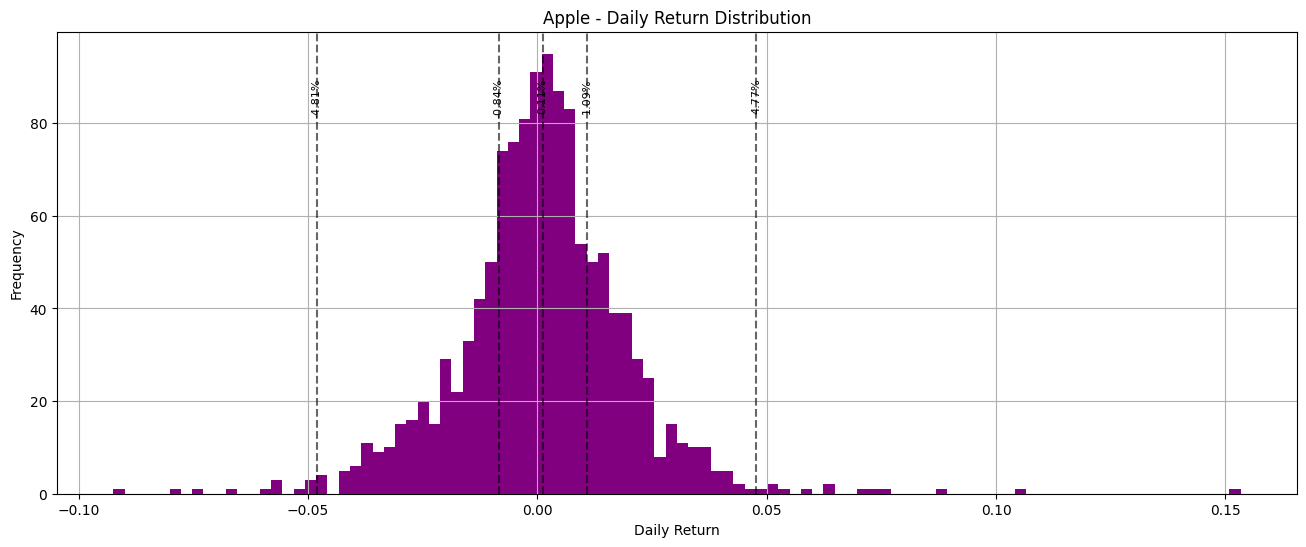

In [52]:
df = stock_data['Apple']
daily_returns = df['Daily Return'].dropna()

percentiles = np.percentile(daily_returns, [1, 25, 50, 75, 99])

plt.figure(figsize=(16,6))
daily_returns.hist(bins=100, color='purple')
plt.title('Apple - Daily Return Distribution')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)

# Draw vertical lines at percentiles
for p in percentiles:
    plt.axvline(p, linestyle='--', color='black', alpha=0.6)
    plt.text(p, plt.ylim()[1]*0.9, f'{p:.2%}', rotation=90, va='top', ha='center', fontsize=8)

plt.show()

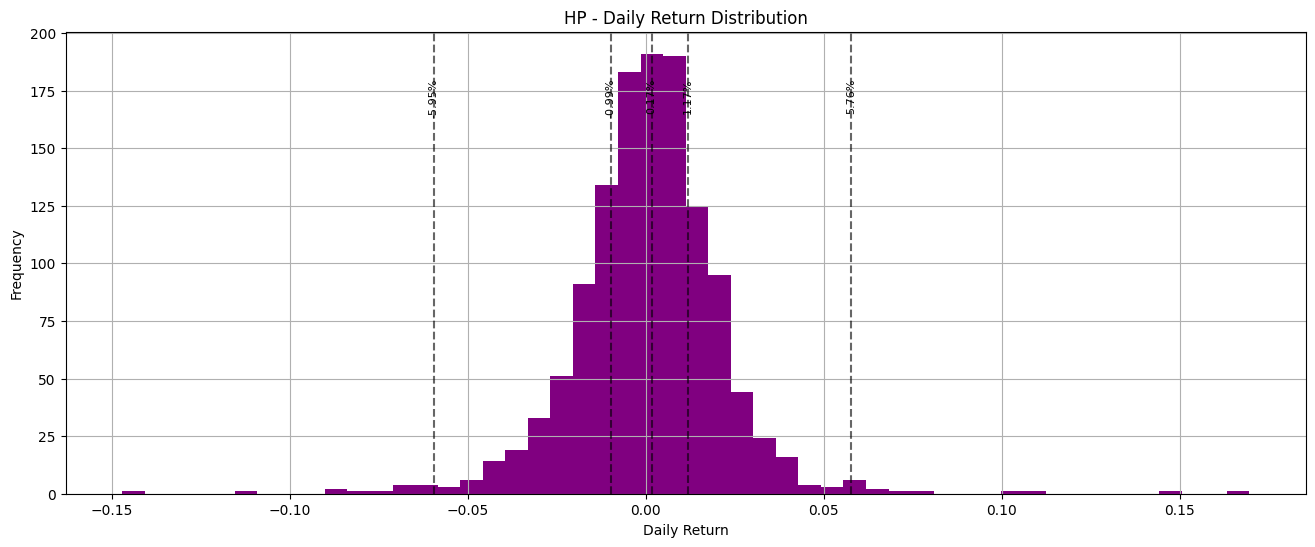

In [53]:
df = stock_data['HP']
daily_returns = df['Daily Return'].dropna()

percentiles = np.percentile(daily_returns, [1, 25, 50, 75, 99])

plt.figure(figsize=(16,6))
daily_returns.hist(bins=50, color='purple')
plt.title('HP - Daily Return Distribution')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)

# Draw vertical lines at percentiles
for p in percentiles:
    plt.axvline(p, linestyle='--', color='black', alpha=0.6)
    plt.text(p, plt.ylim()[1]*0.9, f'{p:.2%}', rotation=90, va='top', ha='center', fontsize=8)

plt.show()

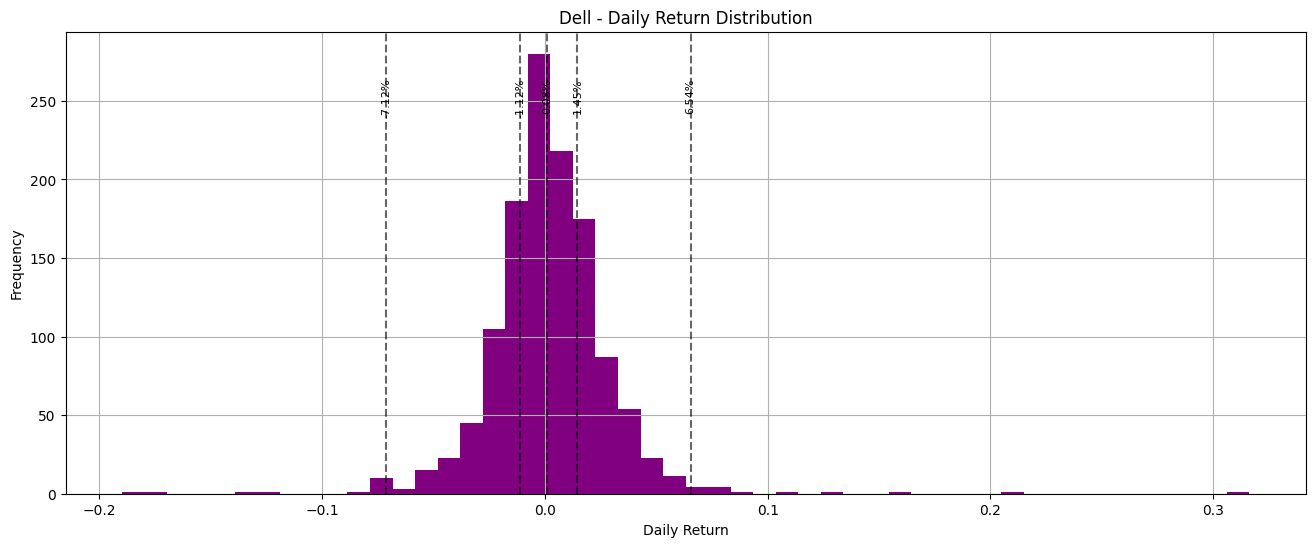

In [54]:
df = stock_data['Dell']
daily_returns = df['Daily Return'].dropna()

percentiles = np.percentile(daily_returns, [1, 25, 50, 75, 99])

plt.figure(figsize=(16,6))
daily_returns.hist(bins=50, color='purple')
plt.title('Dell - Daily Return Distribution')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)

# Draw vertical lines at percentiles
for p in percentiles:
    plt.axvline(p, linestyle='--', color='black', alpha=0.6)
    plt.text(p, plt.ylim()[1]*0.9, f'{p:.2%}', rotation=90, va='top', ha='center', fontsize=8)

plt.show()

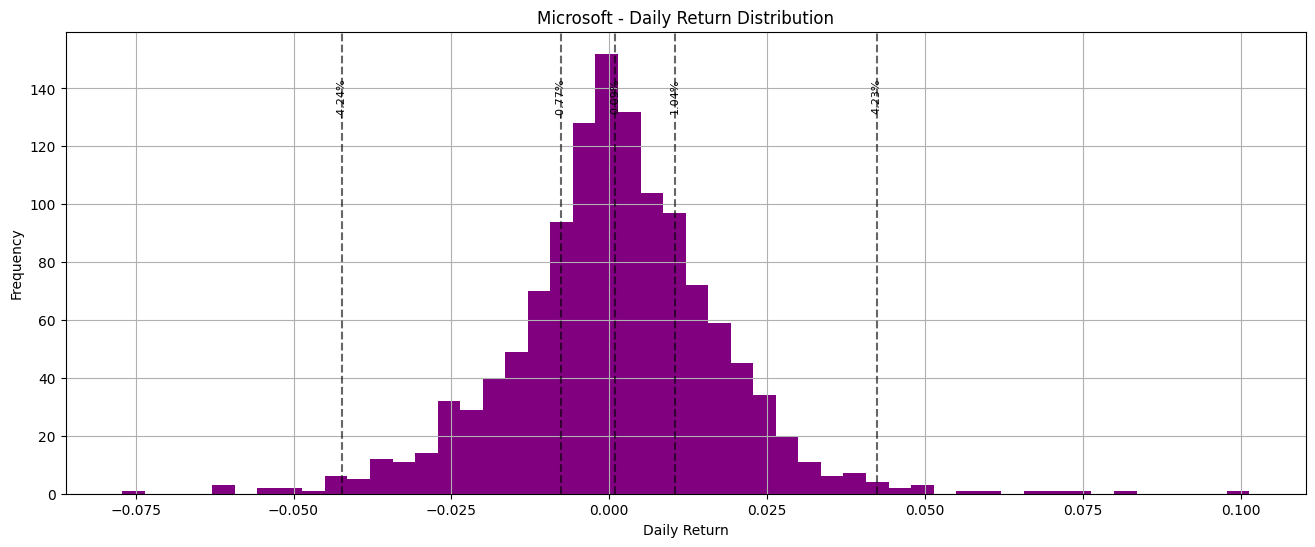

In [55]:
df = stock_data['Microsoft']
daily_returns = df['Daily Return'].dropna()

percentiles = np.percentile(daily_returns, [1, 25, 50, 75, 99])

plt.figure(figsize=(16,6))
daily_returns.hist(bins=50, color='purple')
plt.title('Microsoft - Daily Return Distribution')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)

# Draw vertical lines at percentiles
for p in percentiles:
    plt.axvline(p, linestyle='--', color='black', alpha=0.6)
    plt.text(p, plt.ylim()[1]*0.9, f'{p:.2%}', rotation=90, va='top', ha='center', fontsize=8)

plt.show()

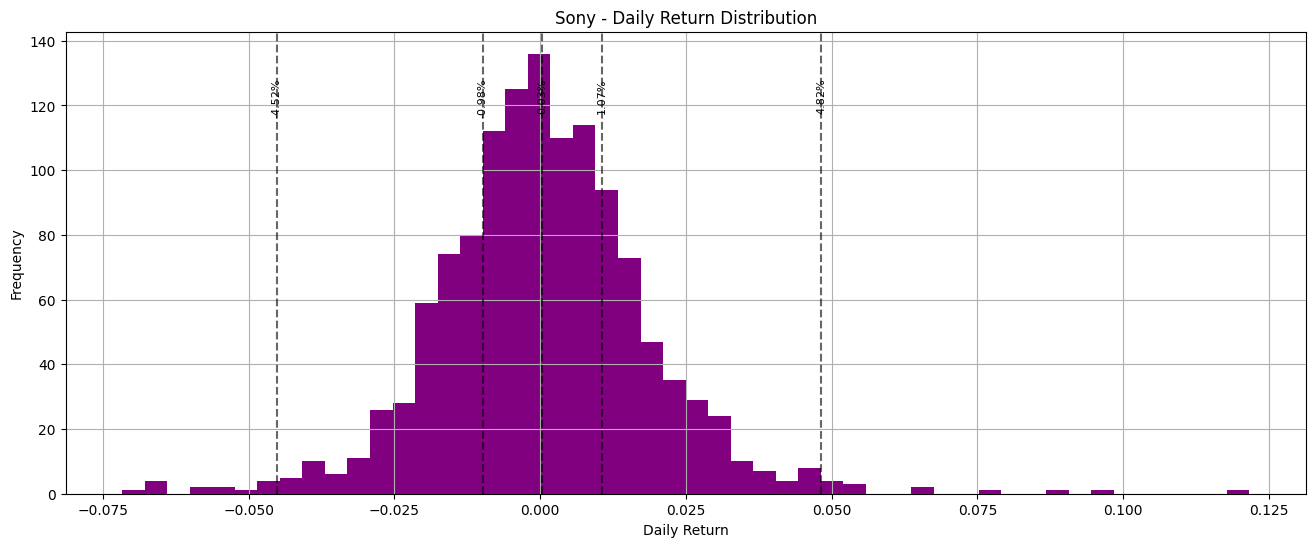

In [56]:
df = stock_data['Sony']
daily_returns = df['Daily Return'].dropna()

percentiles = np.percentile(daily_returns, [1, 25, 50, 75, 99])

plt.figure(figsize=(16,6))
daily_returns.hist(bins=50, color='purple')
plt.title('Sony - Daily Return Distribution')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)

# Draw vertical lines at percentiles
for p in percentiles:
    plt.axvline(p, linestyle='--', color='black', alpha=0.6)
    plt.text(p, plt.ylim()[1]*0.9, f'{p:.2%}', rotation=90, va='top', ha='center', fontsize=8)

plt.show()

## Daily Return Distribution (2021–2025)

The table below summarizes the daily return distributions for the selected tech companies over a five-year period using key percentiles:

| Company    | 1st %ile  | 25th %ile | Median  | 75th %ile | 99th %ile |
|------------|-----------|-----------|---------|-----------|-----------|
| Apple      | -4.81%    | -0.84%    | +0.12%  | +1.10%    | +4.77%    |
| Dell       | -7.12%    | -1.13%    | +0.08%  | +1.45%    | +6.54%    |
| Microsoft  | -4.24%    | -0.77%    | +0.09%  | +1.04%    | +4.23%    |
| HP         | -6.04%    | -0.99%    | +0.17%  | +1.18%    | +5.76%    |
| Sony       | -4.53%    | -0.98%    | +0.03%  | +1.07%    | +4.82%    |

### Observations:

1. Dell displayed the widest spread of daily returns, with values ranging from -7.12% to +6.54%, indicating higher day-to-day price volatility. This aligns with Dell’s known performance surges in 2024–2025.

2. HP also exhibited relatively high volatility, with returns between -6.04% and +5.76%, though its median return of +0.17% was the highest among all companies — suggesting small but more frequent gains.

3. Apple, Microsoft, and Sony had narrower ranges:
   - Apple: Daily returns mostly ranged between -4.81% and +4.77%, centered around a median of +0.12%.
   - Microsoft: Showed a similar pattern, with a slightly lower spread (-4.24% to +4.23%) and a stable median of +0.09%.
   - Sony: Had the tightest and most symmetrical range, with returns between -4.53% and +4.82%, and a near-zero median (+0.03%), consistent with its lower volatility profile from other metrics.

4. The interquartile range which is the distance between the 25th and 75th percentiles was generally around 2% for all companies, suggesting that 50% of all trading days fell within a relatively modest gain/loss window.

---

### Conclusion:

Overall, Dell and HP experienced the most extreme daily return variations, reflecting their more volatile behavior in price performance. Meanwhile, Microsoft, Apple, and Sony had more stable and symmetrical return distributions, with medians close to 0% and narrower tails. These patterns reinforce earlier volatility insights, where Dell’s dramatic gains came with increased risk, and Sony maintained a low-risk, steady profile.


In [57]:
for name, df in stock_data.items():
    df['Cumulative Return'] = (1 + df['Daily Return']).cumprod()

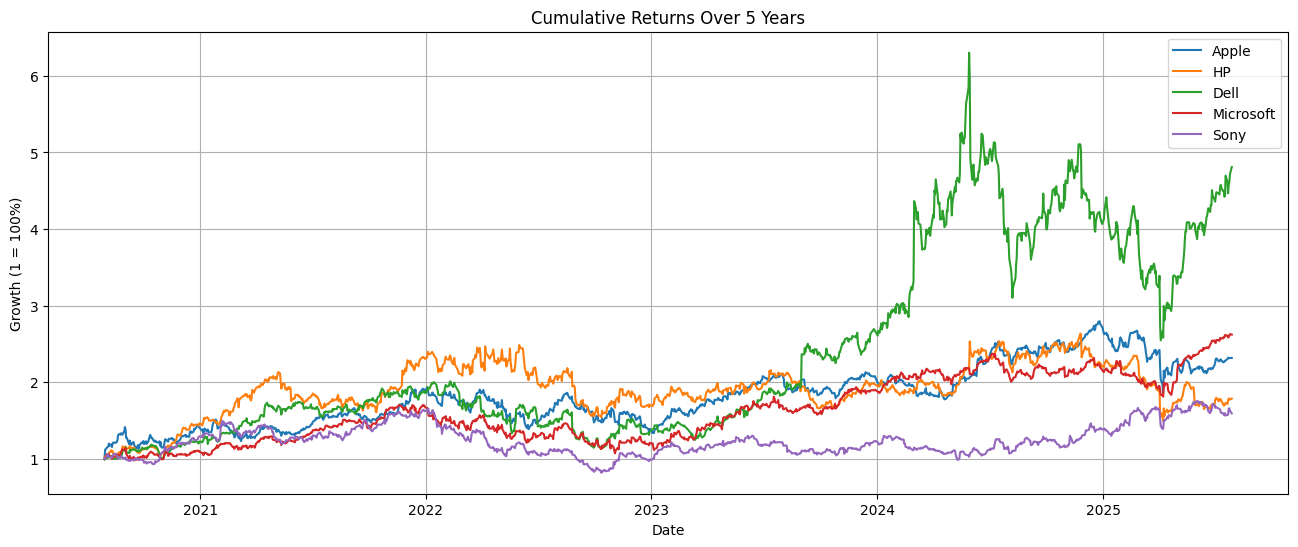

In [58]:
plt.figure(figsize=(16,6))

for name in tickers:
    plt.plot(stock_data[name]['Cumulative Return'], label=name)

plt.title('Cumulative Returns Over 5 Years')
plt.xlabel('Date')
plt.ylabel('Growth (1 = 100%)')
plt.legend()
plt.grid()
plt.show()

# Cumulative Returns (2021–2025)
The line chart above illustrates the cumulative percentage return for each company’s stock over the five-year period. Cumulative return shows the total percentage growth since the starting point, offering a clear view of long-term performance.

### Observations:
All companies experienced overall growth in cumulative returns between 100% and 200% over most of the five-year period. This suggests consistent positive performance across the tech sector, despite occasional dips.

1. HP exhibited several short-term growth spikes, particularly in 2022–2023, where it temporarily exceeded 200% growth while other companies remained in the 100–150% range. However, these surges were not sustained long-term.

2. By mid-2023 to early 2024, cumulative returns for all companies had stabilized in the 100–200% range thus reflecting a period of relatively steady performance across the board.

3. Dell stood out significantly in late 2023 to mid-2024, with a sharp growth surge that pushed its cumulative return beyond 300%, eventually peaking near 600% by Q2 2024. Although it experienced a correction later in the year, dropping back to 300%, Dell began a recovery in 2025, climbing again toward 500% by year-end.

4. Apple and HP maintained solid upward trajectories throughout the period, both settling in the 200–300% cumulative return range by 2025.

5. Sony showed the most conservative growth among the group, never exceeding 200% and ending the period near 180% and consistent with its lower daily volatility and smaller price movements observed in earlier sections.

### Conclusion:
The cumulative return chart highlights Dell as the strongest performer, with standout growth during 2024 that significantly outpaced peers. Apple and HP also demonstrated healthy long-term gains, maintaining steady upward trends. In contrast, Sony remained the most stable but least aggressive in growth, which may appeal to more risk-averse investors. Overall, while all companies delivered positive cumulative returns over five years, the magnitude and timing of their growth varied, reflecting different investment profiles and market behaviors.

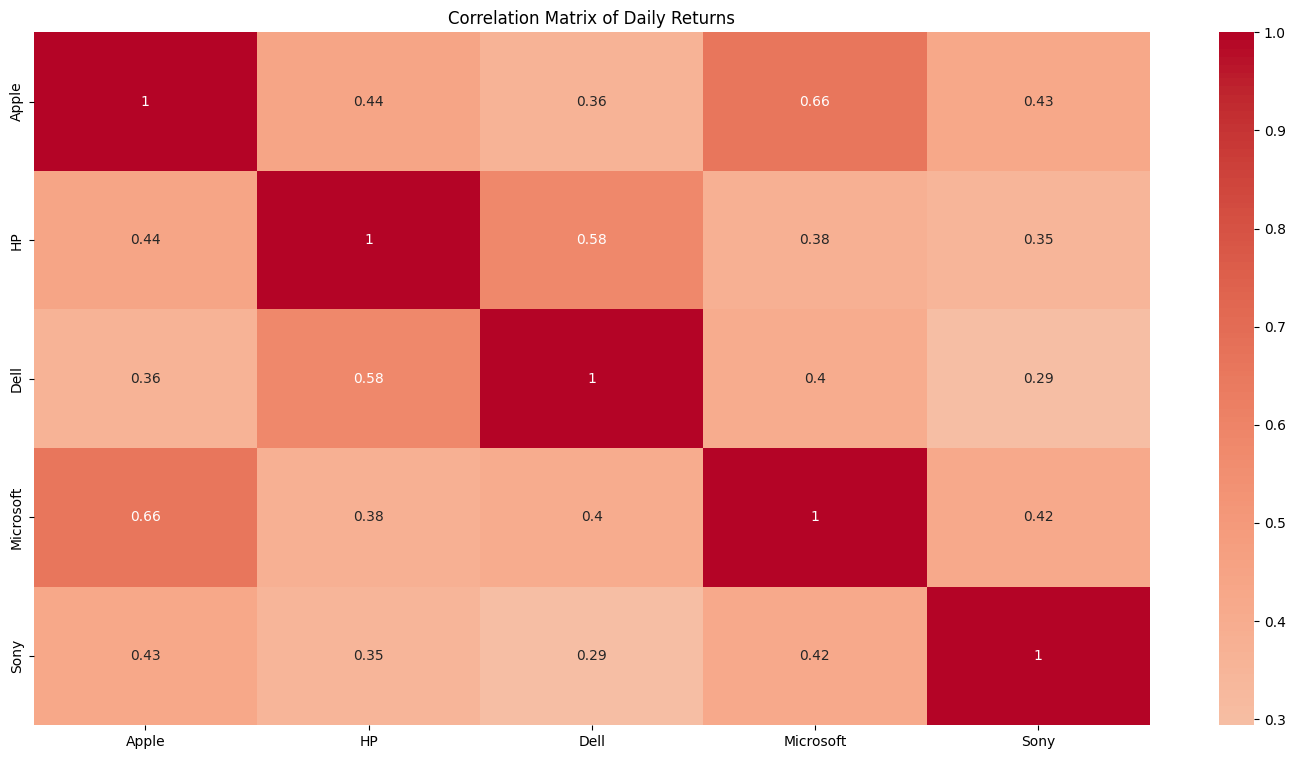

In [67]:
returns_df = pd.DataFrame({name: df['Daily Return'] for name, df in stock_data.items()})
correlation = returns_df.corr()

plt.figure(figsize=(18,9))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Daily Returns')
plt.show()

## Correlation Matrix (Daily Returns)

The table below shows the correlation coefficients between daily returns of the selected tech companies from 2021 to 2025. Correlation values range from -1 to +1, where:

- +1 indicates perfect positive correlation (they move together),
-  0 indicates no relationship,
- -1 indicates perfect negative correlation (they move in opposite directions).

### Observations:

1. **Apple and Microsoft** exhibit the **strongest correlation (0.66)** among all pairs, indicating they often move in the same direction — likely due to shared exposure to the U.S. tech sector and global trends in software/cloud.

2. **HP and Dell** also show **moderate correlation (0.58)**, reflecting their similar roles in the PC and enterprise hardware market.

3. **Sony** consistently shows the **lowest correlations** with the others (mostly between 0.29 and 0.43), suggesting its stock behaves more independently — likely due to differences in industry exposure (gaming, entertainment, Japanese market).

4. **Apple and HP**, **Apple and Dell**, and **Microsoft and Dell** all show mild correlations (0.36–0.44), indicating partial alignment in trends but not strong co-movement.

---

### Conclusion:

The correlation matrix reveals that **Apple–Microsoft** and **HP–Dell** are the most closely aligned in daily return movements, reflecting shared industry or market dynamics. **Sony**, on the other hand, appears the most decoupled, offering potential diversification benefits due to its distinct return behavior. Investors aiming to diversify within the tech sector may consider Sony alongside stronger-correlated stocks to balance their portfolios.


## Final Summary

Across all metrics analyzed — closing prices, cumulative returns, daily returns, volatility, moving averages, and correlations — clear patterns emerge among the selected tech companies:

- **Dell** delivered the highest cumulative returns but also experienced the most volatility, making it attractive for high-growth investors willing to accept more risk.
- **Apple** and **Microsoft** maintained strong, stable growth with moderate volatility and high correlation, suggesting similar market dynamics and consistent investor confidence.
- **HP** showed intermittent performance spikes, suggesting potential but less predictability.
- **Sony**, while showing the least growth, maintained low volatility and minimal correlation with other companies — making it the most stable and potentially useful for portfolio diversification.

These findings help distinguish each company's stock profile, allowing investors to match their risk preferences and strategy to the characteristics of each stock.
